In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("assignment4.ipynb")

# Clustering in Practice and K-Means Clustering

Please complete the following assignment. Run all cells and submit your completed notebook through Gradescope.

- Clustering is a fundamental unsupervised learning technique used to group similar data points based on their features. It helps in discovering patterns and structures within datasets without predefined labels.

- The k-means algorithm aims to partition a dataset into k clusters, assigning each data point to the cluster whose centroid is closest to that point.

**In this assignment, the aim is to check and reinforce your understanding  of clustering, specifically K-Means clustering.**


**Note:** Do not change any of the parameters given in the starter code (e.g., random_state=42, number of samples, centers, or cluster standard deviation).  

These fixed values ensure your results are reproducible and match the expected test cases.  

<!-- BEGIN QUESTION -->

#### 1. Which of the following best describes the objective function minimized in k-means clustering?

A) The variance between cluster centroids.

B) The sum of squared distances between all pairs of data points.

C) The sum of squared distances between each point and its assigned cluster centroid.

D) The determinant of the covariance matrix of the clusters.

C

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### 2. Which of the following is a known limitation of k-means?

A) It cannot be implemented in higher dimensions.

B) It performs poorly when clusters have non-spherical shapes.

C) It can only work with datasets having fewer than 1,000 points.

D) It guarantees the global optimum clustering solution.

B

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### 3. What is the main advantage of using the k-means++ initialization method over the standard k-means initialization?

A) It selects initial centroids that are maximally distant from each other, ensuring convergence to the global optimum.

B) It reduces the computational complexity of k-means from quadratic to linear time with respect to the number of data points.

C) It allows k-means clustering to automatically determine the optimal number of clusters without prior specification.

D) It probabilistically selects initial centroids based on data density, leading to faster convergence and improved clustering results.

D

<!-- END QUESTION -->

#### 4-a. Clustering on Isotropic Gaussian Distributed Data

- A synthetic dataset has been generated using sklearn’s `make_blobs`.  
- Apply **K-Means clustering** with `k = 3`.  
- Plot the clustered data and highlight the cluster centers with a distinct marker.  
- Return:  
  - The cluster centers  
  - The predicted cluster labels  
  - The Within-Cluster Sum of Squares (WCSS)  

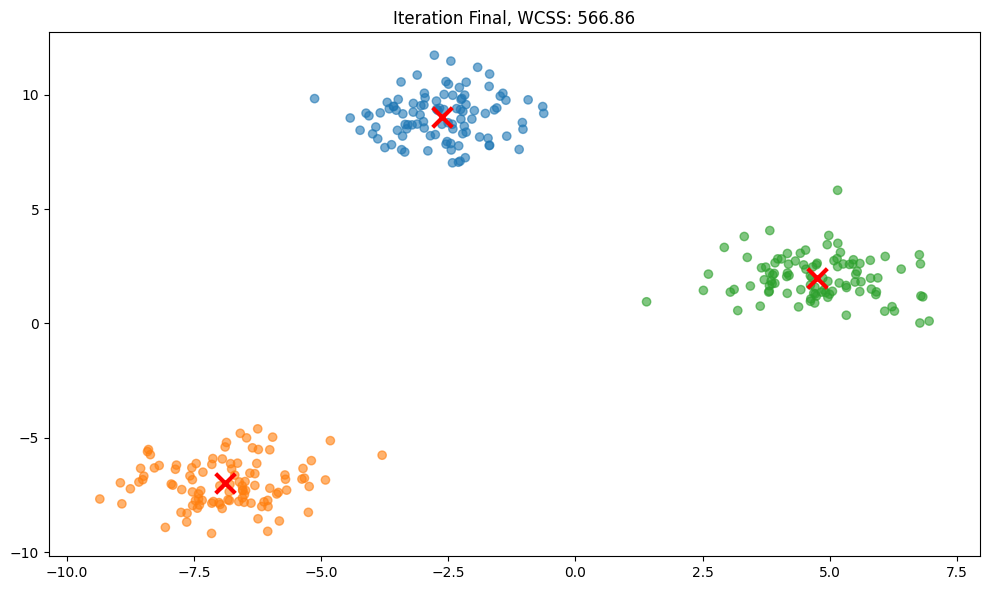

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


# Colors for each cluster
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Return an array containing the center label with the lowest distance to this point in X
def assign_clusters(X, centroids):
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

# Return an array of centroids on the mean for that centroid's points.
def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

# Function to calculate within-cluster sum of squares
def calculate_wcss(X, labels, centroids,k):
    return sum(np.sum((X[labels == i] - centroids[i])**2) for i in range(k))

def ans4a():
    X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)
   
    iters = 6
    # Initialize centroids randomly
    k = 3
    np.random.seed(42)
    centers = X[np.random.choice(300, k, replace=False)]

    # Set up the clustering progress plot
    fig1, axs = plt.subplots(1, 1, figsize=(10, 6))


    # Run k-means iterations and plot
    for i in range(iters):
        # Assign clusters
        y_kmeans = assign_clusters(X, centers)
        
        # Calculate WCSS
        wcss = calculate_wcss(X, y_kmeans, centers,k)
        
        # Update centroids (except for the last iteration)
        if i < iters-1:
            centers = update_centroids(X, y_kmeans, k)

        # Plot the current clustering state
    axs.scatter(X[:, 0], X[:, 1], c=[colors[l] for l in y_kmeans], alpha=0.6)
    axs.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, linewidths=3)
    axs.set_title(f'Iteration {i if i < 5 else "Final"}, WCSS: {wcss:.2f}')
    axs.set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
    axs.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

    plt.tight_layout()

    # Return the following values:
    # - The cluster centers
    # - The predicted cluster labels
    # - The Within-Cluster Sum of Squares (WCSS)
    # - The original data points
    return centers, y_kmeans, wcss, X


centers, y_kmeans, inertia, X = ans4a()

q4a results: All test cases passed!

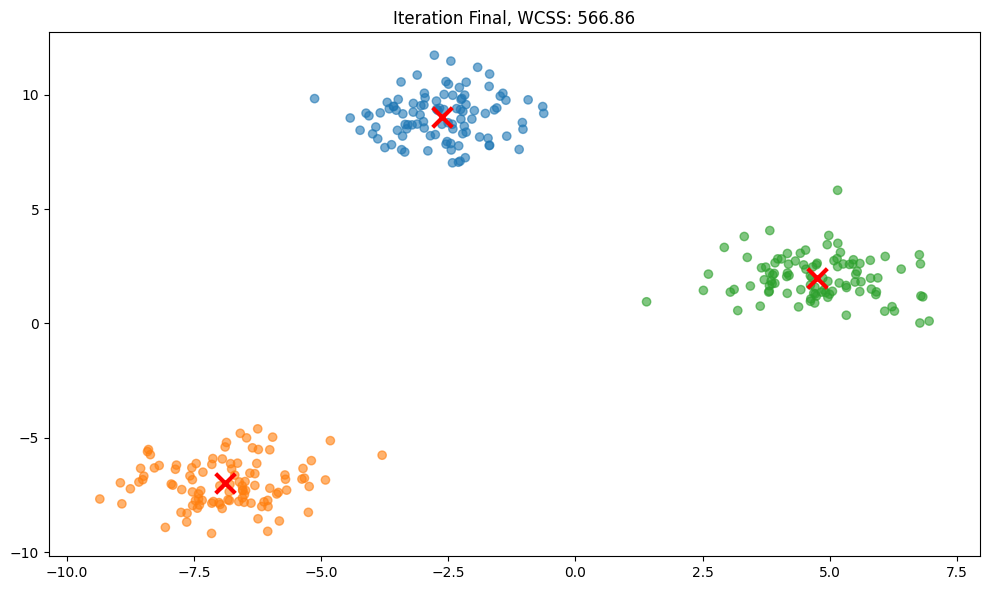

In [3]:
grader.check("q4a")

<!-- BEGIN QUESTION -->

#### 4-b. Plot the original data points and the clustered data points
 
- Plot the clustered data and highlight the cluster centers with a distinct marker.  

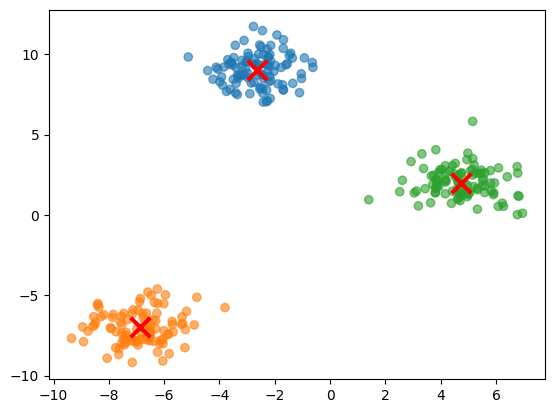

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=[colors[l] for l in y_kmeans], alpha=0.6)
    
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, linewidths=3)

<!-- END QUESTION -->

#### 5a. Clustering on funky-looking anisotropic data

- A synthetic dataset has been generated using sklearn’s `make_moons`.  
- Apply **K-Means clustering** with `k = 2`.  
- Return:  
  - The predicted cluster labels  
  - The true labels  
  - The Adjusted Rand Index (ARI)
  - The original data points
  - The true labels
  - The cluster centers

In [5]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

def ans5a():
    # Generate noisy moons dataset
    X, y_true = make_moons(n_samples=300, noise=0.15, random_state=42)
    
    np.random.seed(42)
    
    iters = 6
    # Initialize centroids randomly
    k = 2
    centers_ = X[np.random.choice(300, k, replace=False)]

    # Set up the clustering progress plot
    #fig1, axs = plt.subplots(1, 1, figsize=(10, 6))
    #axs = axs.ravel()

    # Colors for each cluster
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

    # List to store WCSS values
    wcss_values = []

    # Run k-means iterations and plot
    for i in range(iters):
        # Assign clusters
        y_kmeans = assign_clusters(X, centers_)
        
        # Calculate WCSS
        wcss = calculate_wcss(X, y_kmeans, centers_,k)
        wcss_values.append(wcss)
        
        # Update centroids (except for the last iteration)
        if i < iters-1:
            centers_ = update_centroids(X, y_kmeans, k)

    # Plot the current clustering state
    #axs.scatter(X[:, 0], X[:, 1], c=[colors[l] for l in y_kmeans], alpha=0.6)
    #axs.scatter(centers_[:, 0], centers_[:, 1], c='red', marker='x', s=200, linewidths=3)
    #axs.set_title(f'Iteration {i if i < 5 else "Final"}, WCSS: {wcss:.2f}')
    #axs.set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
    #axs.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

    plt.tight_layout()

    ari = adjusted_rand_score(y_true,y_kmeans)
    # Return the following values:
    # - The predicted cluster labels
    # - The true labels
    # - The Adjusted Rand Index (ARI)
    # - The original data points
    # - The true labels
    # - The cluster centers
    
    return y_kmeans, y_true, ari, X, y_true, centers_


y_kmeans, y_true, ari, X, y_true, centers = ans5a()

<Figure size 640x480 with 0 Axes>

In [6]:
grader.check("q5a")

q5a results: All test cases passed!

<Figure size 640x480 with 0 Axes>

<!-- BEGIN QUESTION -->

#### 5-b. Plot the clustered data

- Make two plots:  
  - Plot the original data points.
  - Plot the clustered data and highlight the cluster centers with a distinct marker.  


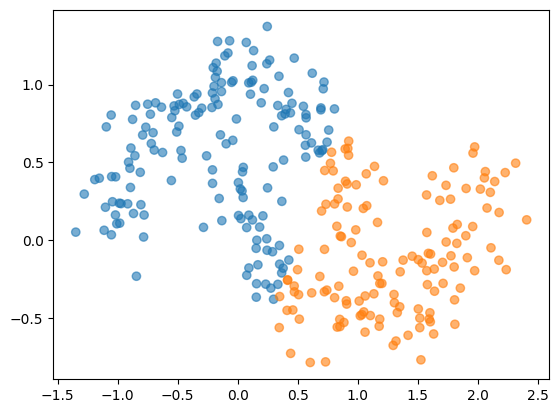

In [7]:
plt.scatter(X[:, 0], X[:, 1], c = [colors[l] for l in y_kmeans], alpha=0.6)

    # Colors for each cluster

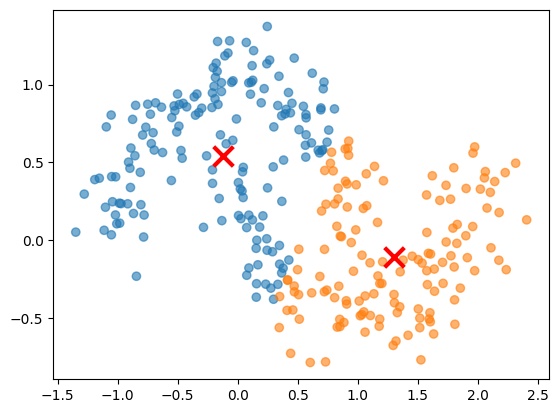

In [8]:
plt.scatter(X[:, 0], X[:, 1],c = [colors[l] for l in y_kmeans], alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, linewidths=3)

<!-- END QUESTION -->

#### 6-a. Comparing K-Means Initialization Methods

- In this question, you will **compare** K-Means clustering using **random initialization** and **k-means++ initialization** on synthetic data generated with `make_blobs`.  
- Apply K-Means with the same number of clusters for both initialization methods.
- Compare the two approaches by reporting:  
  - The number of iterations until convergence  
  - The WCSS (within-cluster sum of squares)    
- Return the following values:
  - `n_iter_random`, `n_iter_kpp`, `wcss_random`, `wcss_kpp`

In [9]:
import warnings

max_iters = 6
k = 5

def run(centers,X):
    # Run k-means iterations and plot
    wcss = 10000
    n_iter = 0
    # Set up the clustering progress plot
    #fig1, axs = plt.subplots(2, 3, figsize=(10, 6))
    #axs = axs.ravel()
    while (n_iter<max_iters) & (wcss > 0):

        # Assign clusters
        y_kmeans = assign_clusters(X, centers)
        
        # Calculate WCSS
        wcss = calculate_wcss(X, y_kmeans, centers,k)
        
        # Update centroids (except for the last iteration)
        if n_iter < max_iters-1:
            centers = update_centroids(X, y_kmeans, k)

        # Plot the current clustering state
        #axs[n_iter].scatter(X[:, 0], X[:, 1], alpha=0.6)
        #axs[n_iter].scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, linewidths=3)
        #axs[n_iter].set_title(f'Iteration {n_iter if n_iter < 5 else "Final"}, WCSS: {wcss:.2f}')
        #axs[n_iter].set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
        #axs[n_iter].set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
        n_iter+=1
    return n_iter,wcss

def ans6a():
    # Generated synthetic dataset with 5 clusters
    X, y_true = make_blobs(n_samples=1000, centers=5, cluster_std=0.60, random_state=42)
    
    # Initialize centroids randomly
    np.random.seed(42)
    centers_random = X[np.random.choice(1000, k, replace=False)]

    #initialize centers k++
    np.random.seed(42)
    centers_kpp = X[np.random.choice(1000, 1, replace=False)]
    for i in range(k-1):
        distances = ((X - centers_kpp[:, np.newaxis])**2).sum(axis=2)
        closest = np.min(distances,axis=0)

        centers_kpp = np.append(centers_kpp,X[np.random.choice(1000,1,replace=False,p=closest/np.sum(closest))],axis=0)

    n_iters_random,wcss_random = run(centers_random,X)  
    n_iters_kpp,wcss_kpp = run(centers_kpp,X)


    #plt.tight_layout()

    # Return the following values:
    # - The cluster centers
    # - The predicted cluster labels
    # - The Within-Cluster Sum of Squares (WCSS)
    # - The original data points
    return n_iters_random,n_iters_kpp,wcss_random,wcss_kpp

ans6a()

(6, 6, np.float64(698.7711305676505), np.float64(698.7711305676506))

In [10]:
grader.check("q6a")

q6a results: All test cases passed!

<!-- BEGIN QUESTION -->

#### 6-b. Briefly explain how the choice of initialization (random vs. k-means++) influences the convergence speed and the quality of the clustering results.  

k++ has better initial inertia and faster convergence speed. Both converge on similar quality results over a large number of iterations.

<!-- END QUESTION -->

#### 7-a. Determining Optimal K Using the Elbow Method  

- In this question, you will explore how to select the optimal number of clusters using the **Elbow Method**.  
- Run **K-Means clustering** on a synthetic dataset for different values of `k` (from 1 to 10), using the **k-means++ initialization** strategy.  
- For each `k`:  
  - Record the Within-Cluster Sum of Squares (WCSS).  
  - Record the Rand Index score relative to the true labels.  
- Based on the results, determine the **optimal `k` value**.  
- Return the following values (in this order):  
  - `optimal_k`: the optimal number of clusters, 
  - `rand_scores_list`: the list of Rand Index scores, 
  - `wcss_list`: the list of WCSS values, 
  - `k_values`: the list of k values, 
  - `wcss_list`: the list of WCSS values 

In [11]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import warnings

def run(centers,X,k):
    # Run k-means iterations and plot
    wcss = 10000
    n_iter = 0

    while (n_iter<max_iters) & (wcss > 0):

        # Assign clusters
        y_kmeans = assign_clusters(X, centers)
        
        # Calculate WCSS
        wcss = calculate_wcss(X, y_kmeans, centers,k)
        
        # Update centroids (except for the last iteration)
        if n_iter < max_iters-1:
            centers = update_centroids(X, y_kmeans, k)
        
        n_iter+=1

    return y_kmeans,wcss


def ans7a():
    # Set up the clustering progress plot
    #fig1, axs = plt.subplots(5,2, figsize=(15, 15))
    #axs = axs.ravel()

    # Generated synthetic dataset with 5 clusters
    X, y_true = make_blobs(n_samples=1000, centers=5, cluster_std=0.60, random_state=42)
    
    rand_scores_list = []
    wcss_list = []

    for k in range(1,11):
        #initialize centers k++
        np.random.seed(42)
        centers_kpp = X[np.random.choice(1000, 1, replace=False)]
        for i in range(k-1):
            distances = ((X - centers_kpp[:, np.newaxis])**2).sum(axis=2)
            closest = np.min(distances,axis=0)

            centers_kpp = np.append(centers_kpp,X[np.random.choice(1000,1,replace=False,p=closest/np.sum(closest))],axis=0)

        y_kmeans,wcss = run(centers_kpp,X,k)
        rand_scores_list.append(adjusted_rand_score(y_true,y_kmeans))
        wcss_list.append(wcss)
        
        # Plot the current clustering state
        #axs[k-1].scatter(X[:, 0], X[:, 1], alpha=0.6)
        #axs[k-1].scatter(centers_kpp[:, 0], centers_kpp[:, 1], c='red', marker='x', s=200, linewidths=3)
        #axs[k-1].set_title(f'K= {k-1 if k-1 < 10 else "Final"}, WCSS: {wcss:.2f}')
        #axs[k-1].set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
        #axs[k-1].set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

    #plt.tight_layout()

    optimal_k = np.argmax(np.array(rand_scores_list))+1
    return optimal_k,rand_scores_list,wcss_list,range(1,11),wcss_list

        

optimal_k, rand_scores, wcss, k_values, wcss_list = ans7a()

In [12]:
grader.check("q7a")

q7a results: All test cases passed!

<!-- BEGIN QUESTION -->

#### 7-b. Elbow Curve

- Create a visualization of the **Elbow Curve** (WCSS vs. k). 

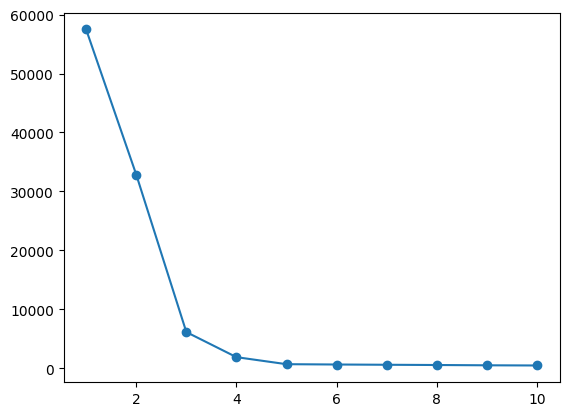

In [13]:
plt.plot(range(1,11),wcss_list)
plt.scatter(range(1,11),wcss_list)

<!-- END QUESTION -->

